In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import random

filename = "avazu-ctr-prediction/train.csv"
n = sum(1 for line in open(filename)) - 1 
s = 2000
skip = sorted(random.sample(range(1,n+1),n-s)) 
df = pd.read_csv(filename, skiprows=skip)

In [3]:
df.head(5)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1002474033882047925,1,14102100,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,1,0,17753,320,50,1993,2,1063,100084,33
1,10032264153126123156,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15705,320,50,1722,0,35,100084,79
2,10036980177628025855,0,14102100,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20366,320,50,2333,0,39,-1,157
3,10058376241903462663,0,14102100,1005,1,5114c672,3f2f3819,3e814130,ecad2386,7801e8d9,...,1,0,19772,320,50,2227,0,687,-1,48
4,10070182618859427075,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,1779deee,2347f47a,...,1,0,20596,320,50,2161,0,35,-1,157


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
id                  200000 non-null uint64
click               200000 non-null int64
hour                200000 non-null int64
C1                  200000 non-null int64
banner_pos          200000 non-null int64
site_id             200000 non-null object
site_domain         200000 non-null object
site_category       200000 non-null object
app_id              200000 non-null object
app_domain          200000 non-null object
app_category        200000 non-null object
device_id           200000 non-null object
device_ip           200000 non-null object
device_model        200000 non-null object
device_type         200000 non-null int64
device_conn_type    200000 non-null int64
C14                 200000 non-null int64
C15                 200000 non-null int64
C16                 200000 non-null int64
C17                 200000 non-null int64
C18                 200000 non-null int

In [5]:
df.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,2.000000e+05,200000.000000,2.000000e+05,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,9.218309e+18,0.169850,1.410256e+07,1004.96733,0.288355,1.015135,0.333735,18828.859090,318.856760,60.208010,2111.398680,1.436550,227.817655,53207.930750,83.173200
std,5.319445e+18,0.375502,2.964422e+02,1.09407,0.507974,0.526666,0.858108,4969.186255,21.092483,47.646229,610.229367,1.324984,352.115624,49957.647782,70.162499
min,1.338641e+13,0.000000,1.410210e+07,1001.00000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000
25%,4.614520e+18,0.000000,1.410230e+07,1005.00000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000
50%,9.208074e+18,0.000000,1.410260e+07,1005.00000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100048.000000,61.000000
75%,1.381903e+19,0.000000,1.410281e+07,1005.00000,1.000000,1.000000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100096.000000,101.000000
max,1.844671e+19,1.000000,1.410302e+07,1012.00000,7.000000,5.000000,5.000000,24049.000000,1024.000000,1024.000000,2758.000000,3.000000,1839.000000,100248.000000,255.000000


In [6]:
df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

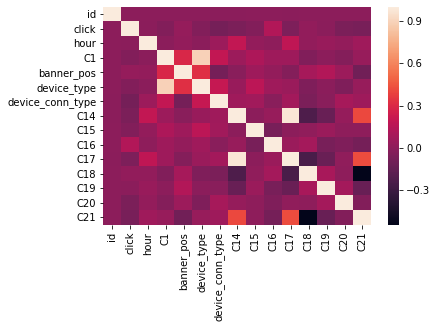

In [7]:
sns.heatmap(df.corr(), annot=False)

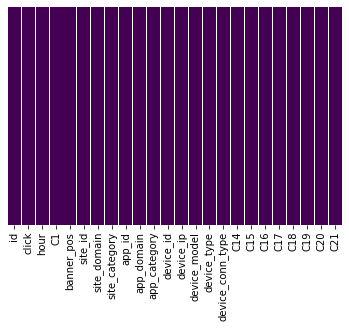

In [8]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap= 'viridis')

In [9]:
df.head(5)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1002474033882047925,1,14102100,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,1,0,17753,320,50,1993,2,1063,100084,33
1,10032264153126123156,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15705,320,50,1722,0,35,100084,79
2,10036980177628025855,0,14102100,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20366,320,50,2333,0,39,-1,157
3,10058376241903462663,0,14102100,1005,1,5114c672,3f2f3819,3e814130,ecad2386,7801e8d9,...,1,0,19772,320,50,2227,0,687,-1,48
4,10070182618859427075,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,1779deee,2347f47a,...,1,0,20596,320,50,2161,0,35,-1,157


In [10]:
df.drop(['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model'], axis= 1, inplace = True)

In [11]:
df.head()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1002474033882047925,1,14102100,1005,1,1,0,17753,320,50,1993,2,1063,100084,33
1,10032264153126123156,0,14102100,1005,0,1,0,15705,320,50,1722,0,35,100084,79
2,10036980177628025855,0,14102100,1005,0,1,0,20366,320,50,2333,0,39,-1,157
3,10058376241903462663,0,14102100,1005,1,1,0,19772,320,50,2227,0,687,-1,48
4,10070182618859427075,0,14102100,1005,0,1,0,20596,320,50,2161,0,35,-1,157


In [12]:
df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21'],
      dtype='object')

In [13]:
# Class count
count_class_0, count_class_1 = df.click.value_counts()

# Divide by class
df_class_0 = df[df['click'] == 0]
df_class_1 = df[df['click'] == 1]
print(len(df_class_1))
print(len(df_class_0))

33970
166030


In [14]:
X = df.drop('click', axis =1)
y = df['click']

OverSampling

In [15]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
import imblearn

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

98956 new random picked points


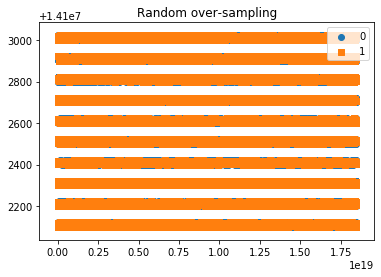

In [19]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros_train, y_ros_train = ros.fit_sample(X_train, y_train)
X_ros_test, y_ros_test = ros.fit_sample(X_test, y_test)

print(X_ros_train.shape[0] - X_train.shape[0], 'new random picked points')

plot_2d_space(X_ros_train, y_ros_train, 'Random over-sampling')

Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
import graphviz

In [21]:
#######X_data, y_data = df(n_samples=5000, noise=0.5, random_state=42)

In [22]:
cl1 = DecisionTreeClassifier(random_state=42)
cl2 = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
params = {'max_leaf_nodes': list(range(2, 30)),
          'min_samples_split': [2, 3, 4],
          'min_samples_leaf': list(range(5, 30))}

In [25]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1)

grid_search_cv.fit(X_ros_train, y_ros_train)

Fitting 3 folds for each of 2100 candidates, totalling 6300 fits


/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: 

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15,

In [26]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=29,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [27]:
grid_search_cv.best_params_

{'max_leaf_nodes': 29, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

GridSearch DecistionTree

In [29]:
y_pred = grid_search_cv.predict(X_ros_test)
accuracy_score(y_ros_test, y_pred)

0.6264680400462072

In [30]:
print(classification_report(y_ros_test, y_pred))
print(confusion_matrix(y_ros_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.51      0.58     41552
           1       0.60      0.74      0.66     41552

    accuracy                           0.63     83104
   macro avg       0.63      0.63      0.62     83104
weighted avg       0.63      0.63      0.62     83104

[[21278 20274]
 [10768 30784]]


In [31]:
cl1.fit(X_ros_train, y_ros_train)
y_pred = cl1.predict(X_ros_test)
accuracy_score(y_ros_test, y_pred)

0.5442698305737389

In [32]:
print(classification_report(y_ros_test, y_pred))
print(confusion_matrix(y_ros_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.85      0.65     41552
           1       0.61      0.24      0.35     41552

    accuracy                           0.54     83104
   macro avg       0.57      0.54      0.50     83104
weighted avg       0.57      0.54      0.50     83104

[[35139  6413]
 [31460 10092]]


In [33]:
cl2.fit(X_ros_train, y_ros_train)
y_pred = cl2.predict(X_ros_test)
accuracy_score(y_ros_test, y_pred)

0.5687812860993454

In [34]:
print(classification_report(y_ros_test, y_pred))
print(confusion_matrix(y_ros_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.75      0.63     41552
           1       0.61      0.39      0.48     41552

    accuracy                           0.57     83104
   macro avg       0.58      0.57      0.55     83104
weighted avg       0.58      0.57      0.55     83104

[[30974 10578]
 [25258 16294]]


In [35]:
cl1.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 42,
 'splitter': 'best'}

GridSearch Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
params = {'max_leaf_nodes': list(range(2, 30)),
          'min_samples_split': [2, 3, 4],
          'min_samples_leaf': list(range(5, 30))}

In [38]:
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), params, n_jobs=-1, verbose=1)

grid_search_cv.fit(X_ros_train, y_ros_train)

Fitting 3 folds for each of 2100 candidates, totalling 6300 fits


/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: 

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_sco...
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_leaf_nodes': [2,

In [39]:
grid_search_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=29,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=24, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [40]:
grid_search_cv.best_params_

{'max_leaf_nodes': 29, 'min_samples_leaf': 24, 'min_samples_split': 2}

In [41]:
y_pred = grid_search_cv.predict(X_ros_test)
accuracy_score(y_ros_test, y_pred)

0.6333750481324605

In [42]:
print(classification_report(y_ros_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.58      0.61     41552
           1       0.62      0.68      0.65     41552

    accuracy                           0.63     83104
   macro avg       0.63      0.63      0.63     83104
weighted avg       0.63      0.63      0.63     83104



In [43]:
print(confusion_matrix(y_ros_test, y_pred))

[[24219 17333]
 [13135 28417]]


In [44]:
print(confusion_matrix(y_ros_test, y_pred))

[[24219 17333]
 [13135 28417]]


Ensemble

In [45]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
def print_score(clf, X, y, cv=0):
    
    y_pred = clf.predict(X)
    acc_score = accuracy_score(y, y_pred)
    clf_report = classification_report(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)
                 
    print(f"Results:\n")
    print(f"accuracy score: {acc_score:.4f}\n")
    print(f"Classification Report: \n {clf_report}\n")
    print(f"Confusion Matrix: \n {conf_matrix}\n")

    if cv > 1:
        res = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
        print(f"Average Accuracy: \t {np.mean(res):.4f}")
        print(f"Accuracy SD: \t\t {np.std(res):.4f}")
        

AdaBoost with RandomForest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [48]:
ada_clf = AdaBoostClassifier(RandomForestClassifier())

In [49]:
ada_clf.fit(X_ros_train, y_ros_train)

/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureW

/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureW

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators='warn',
                     

In [50]:
print_score(ada_clf, X_ros_test, y_ros_test, cv=5)

Results:

accuracy score: 0.5321

Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.94      0.67     41552
           1       0.67      0.13      0.21     41552

    accuracy                           0.53     83104
   macro avg       0.59      0.53      0.44     83104
weighted avg       0.59      0.53      0.44     83104


Confusion Matrix: 
 [[38911  2641]
 [36247  5305]]



/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureW

/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureW

/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureW

/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureW

/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureW

/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureW

/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureW

/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phatarasutarasuwan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureW

Average Accuracy: 	 0.9593
Accuracy SD: 		 0.0034


GradientBoosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_ros_train, y_ros_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [53]:
print_score(gbc_clf, X_ros_test, y_ros_test, cv=5)

Results:

accuracy score: 0.6390

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.57      0.61     41552
           1       0.62      0.70      0.66     41552

    accuracy                           0.64     83104
   macro avg       0.64      0.64      0.64     83104
weighted avg       0.64      0.64      0.64     83104


Confusion Matrix: 
 [[23887 17665]
 [12339 29213]]

Average Accuracy: 	 0.6442
Accuracy SD: 		 0.0030


XGBoosting

In [54]:
import xgboost as xgb

In [5]:
from xgboost import XGBClassifier

In [55]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=50, learning_rate=0.3,
                            n_jobs=-1, random_state = 42)

In [56]:
xgb_clf.fit(X_ros_train, y_ros_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#### print_score(xgb_clf, X_ros_test, y_ros_test, cv=5)

## วิธีที่มีความแม่นยำสูงที่สุดคือ XGBoosting ครับ

หมายเหตุ: ในที่นี้ผมสุ่มตัวอย่างขึ้นมา 200000 row เพราะ หากมากกว่านี้เครื่องผมทำไม่ไหวครับ พอสุ่มมาแล้วก็เอามา
ปรับความไม่เท่ากันของข้อมูลด้วยการ OverSampling ก่อน เพราะข้อมูลที่เป็น Click = 0 มีเยอะกว่ามาก โดยตอนปรับ
ได้ปรับหลังจากแบ่ง Training Set กับTest Set แล้ว